# Part I - (Flight Data Exploratory Data Analysis)
## by Evans Addo-Sampong

## Introduction
> It is bad enough to miss your date or an important appointment because your flight was delayed or, worse, cancelled. It is even worse if you had no idea that this could happen, or if this happens on a regular basis. Wouldn't it be nice to have some fair knowledge about the flight activities of carriers so that you could plan your flights well?
Well, we could try and get some insights into the carriers' flight activities for 2008 from the exploratory analysis of the flight dataset below.
From the analysis, we aim to get some insights into the leading factors that cause flight delays and/or cancellations.



## Preliminary Wrangling


In [13]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [14]:
# import data set and view the first few rows
df = pd.read_csv('2008.csv')
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,1343.0,1325,1451.0,1435,WN,588,...,4.0,9.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
1,2008,1,3,4,1125.0,1120,1247.0,1245,WN,1343,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,2009.0,2015,2136.0,2140,WN,3841,...,2.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,903.0,855,1203.0,1205,WN,3,...,5.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1423.0,1400,1726.0,1710,WN,25,...,6.0,10.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0


In [10]:
# dmension of the data
df.shape

(2389217, 29)

In [12]:
#Get the columns of the data
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

### Structure of the Dataset
> The dataset is fairly large with almost 7.5 million rows and 29 features (columns).

* `Year`: The year for which the data about flights was collected. This data recorded in 2008
* `Month`: The month in the year in which the flight was recorded. 1 represents January, 2 represents February in that order
* `DayofMonth`: The day of the month in which the flight was recorded
* `DayOfWeek`: Day of the week in which the flight was recorded. 1 represents Monday, and 7 represents Sunday
* `DepTime`: The departure time of the flight
* `CRSDepTime`: 'The scheduled departure time of the flight
* `ArrTime`: The actual arrival time of the flight
* `CRSArrTime`: The scheduled arrival time time of the flight
* `UniqueCarrier`: The unique code of the carrier
* `FlightNum`: The flight number
* `TailNum`: The tail number of the aircraft
* `ActualElapsedTime`: The actual elapsed time of the flight
* `CRSElapsedTime`: The scheduled elapsed time of the flight
* `AirTime`: The recorded airtime of the flight
* `ArrDelay`: The recorded arrival delay of the flight
* `DepDelay`: The flight delay time
* `Origin`: The IATA code of the flight orgin
* `Dest`: The IATA code of the flight destination
* `Distance`: Flight distance, measured in miles
* `TaxiIn`: The recorded time for the flight to taxi into the runway
* `TaxiOut`: The recorded time for the flight to taxi out of the runway
* `Cancelled`: Whether the flight was cancelled (0 = No, 1 = Yes)
* `CancellationCode`: Flight cancellation reason (A = carrier, B = weather, C = NAS, D = security)
* `Diverted`: Whether the flight was diverted (0 = No, 1 = Yes)
* `CarrierDelay`: Flight delay caused by carrier
* `WeatherDelay`: Flight delay caused by weather conditions
* `NASDelay`: Flight delay caused by NAS
* `SecurityDelay`: Flight delay caused by security concerns
* `LateAircraftDelay`: Flight delays caused by late arrival of the aircraft


### Features of interest in the dataset

> The `UniqueCarrier` variable is a major feature of interest for this exploration.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The variables Month, DayOfMonth, DayOfWeek, Cancelled, CancellationCode, Diverted, CarrierDelay, WeatherDelay, NASDelay, SecurityDelay and  LateAircraftDelay will be the features of the dataset that will support our investigations into the main feature of interest of the dataset

#### Visual Assessment

#### Programmatic Assessment

In [13]:
# a look at data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389217 entries, 0 to 2389216
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay      

In [14]:
#Descriptive statistics
df.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,2389217.0,2.389217e+06,2.389217e+06,2.389217e+06,2.324775e+06,2.389217e+06,2.319121e+06,2.389217e+06,2.389217e+06,2.319121e+06,...,2.389217e+06,2.319121e+06,2.324775e+06,2.389217e+06,2.389217e+06,584583.000000,584583.000000,584583.000000,584583.000000,584583.000000
mean,2008.0,2.505009e+00,1.566386e+01,3.909625e+00,1.340018e+03,1.329992e+03,1.485835e+03,1.496744e+03,2.213888e+03,1.286189e+02,...,7.261589e+02,6.839862e+00,1.668584e+01,2.697202e-02,2.366466e-03,15.752957,2.938243,16.158462,0.080459,20.976710
std,0.0,1.121493e+00,8.750405e+00,1.980431e+00,4.802717e+02,4.657833e+02,5.081295e+02,4.845238e+02,1.951392e+03,7.025303e+01,...,5.571763e+02,4.846435e+00,1.102905e+01,1.620017e-01,4.858875e-02,40.035487,19.166662,30.534167,1.742579,38.617154
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.400000e+01,...,1.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.0,1.000000e+00,8.000000e+00,2.000000e+00,9.300000e+02,9.270000e+02,1.110000e+03,1.115000e+03,6.050000e+02,7.800000e+01,...,3.250000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2008.0,3.000000e+00,1.600000e+01,4.000000e+00,1.330000e+03,1.325000e+03,1.516000e+03,1.520000e+03,1.544000e+03,1.110000e+02,...,5.830000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,5.000000,0.000000,0.000000
75%,2008.0,4.000000e+00,2.300000e+01,6.000000e+00,1.733000e+03,1.720000e+03,1.914000e+03,1.910000e+03,3.631000e+03,1.600000e+02,...,9.570000e+02,8.000000e+00,1.900000e+01,0.000000e+00,0.000000e+00,16.000000,0.000000,20.000000,0.000000,27.000000
max,2008.0,4.000000e+00,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.741000e+03,9.050000e+02,...,4.962000e+03,2.130000e+02,3.830000e+02,1.000000e+00,1.000000e+00,2436.000000,1148.000000,1357.000000,392.000000,1254.000000


#### 1. Drop duplicated values
#### 2. Convert Month, DayofMonth, DayOfWeek, Diverted datatypes to strings (Object) datatype

In [15]:
# make a copy of dataset to begin data wrangle 
df_copy = df.copy()
df_copy.head(20)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,1343.0,1325,1451.0,1435,WN,588,...,4.0,9.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
1,2008,1,3,4,1125.0,1120,1247.0,1245,WN,1343,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,2009.0,2015,2136.0,2140,WN,3841,...,2.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,903.0,855,1203.0,1205,WN,3,...,5.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1423.0,1400,1726.0,1710,WN,25,...,6.0,10.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
5,2008,1,3,4,2024.0,2020,2325.0,2325,WN,51,...,13.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
6,2008,1,3,4,1753.0,1745,2053.0,2050,WN,940,...,6.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
7,2008,1,3,4,622.0,620,935.0,930,WN,2621,...,7.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
8,2008,1,3,4,1944.0,1945,2210.0,2215,WN,389,...,7.0,15.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
9,2008,1,3,4,1453.0,1425,1716.0,1650,WN,519,...,6.0,13.0,0,NaN,0,11.0,0.0,0.0,0.0,15.0


**Define** : Drop duplicates

**Code**

In [16]:
#  drop duplicates from dataset
df_copy = df.drop_duplicates()

**Test**

In [17]:
# check to confirm there are no duplicate
df_copy.duplicated().sum()

0

**Define**: ConvertMonth, DayofMonth, DayOfWeek, Diverted datatypes to strings (Object) datatype

**Code**

In [18]:
# convert to Month, DayofMonth, DayOfWeek, Diverted datatypes to object datatype
df_copy.Month= df_copy.Month.astype('object')
df_copy.DayofMonth= df_copy.DayofMonth.astype('object')
df_copy.DayOfWeek= df_copy.DayOfWeek.astype('object')
df_copy.Diverted= df_copy.Diverted.astype('object')

/var/folders/9z/j18d1hs552g8rpcpybsp0jj80000gp/T/ipykernel_51247/1912092760.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy.Month= df_copy.Month.astype('object')
/var/folders/9z/j18d1hs552g8rpcpybsp0jj80000gp/T/ipykernel_51247/1912092760.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy.DayofMonth= df_copy.DayofMonth.astype('object')
/var/folders/9z/j18d1hs552g8rpcpybsp0jj80000gp/T/ipykernel_51247/1912092760.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

#### Test

In [19]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2389213 entries, 0 to 2389216
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              object 
 2   DayofMonth         object 
 3   DayOfWeek          object 
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           object 
 24  CarrierDelay       float64
 25  WeatherDelay      

In [20]:
# save wrangled dataset
df_copy.to_csv('df_clean.csv', index = False)

In [22]:
# get a visual view of the few rows of the dataset
df_clean = pd.read_csv('df_clean.csv')
df_clean.sample(20)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
2059497,2008,4,13,7,1502.0,1503,1947.0,1939,US,592,...,4.0,21.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1494672,2008,3,27,4,1652.0,1650,1908.0,1837,DL,985,...,12.0,18.0,0,NaN,0,0.0,0.0,31.0,0.0,0.0
1956458,2008,4,3,4,1632.0,1609,1804.0,1733,OO,5438,...,7.0,11.0,0,NaN,0,23.0,0.0,8.0,0.0,0.0
1917859,2008,4,3,4,1512.0,1505,1648.0,1629,XE,2512,...,3.0,10.0,0,NaN,0,7.0,0.0,12.0,0.0,0.0
445866,2008,1,2,3,2133.0,2118,2201.0,2131,NW,1247,...,7.0,31.0,0,NaN,0,0.0,0.0,15.0,0.0,15.0
878058,2008,2,25,1,708.0,703,1040.0,1022,US,654,...,11.0,28.0,0,NaN,0,5.0,0.0,13.0,0.0,0.0
2178674,2008,4,17,4,701.0,655,817.0,815,MQ,3646,...,4.0,11.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1440237,2008,3,4,2,2225.0,2220,2253.0,2248,US,1552,...,8.0,18.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
725329,2008,2,4,1,2122.0,2125,2239.0,2237,XE,2760,...,5.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1595672,2008,3,24,1,1340.0,1345,1523.0,1530,MQ,4505,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


## Univariate Exploration

> In the exploration and analysis of the data that follows, we will answer the following questions:
1. Which month(s) of the year had more flights?
2. Which day(s) of the month had more flights?
3. Which days of the week had more flights?
4. Which carriers recorded the most flights?
5. Which is the most frequent cause of delay?


#### Question: Which month(s) of the year had more flights?

#### Visualization

In [23]:
# choose a base color for all  visuals
base_color = sns.color_palette()[0]

# get the order of months with highest no. of flights
order_month = df_clean.Month.value_counts().index

In [24]:
# create a plotting function
def plot(data, feature, order):
    sns.countplot(data = data, x =  feature, color = base_color, order = order);

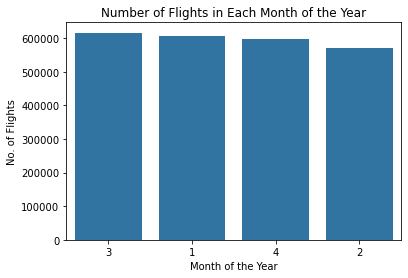

In [27]:
#plot flights of months
plot(df_clean, df_copy.Month, order_month)
plt.title('Number of Flights in Each Month of the Year')
plt.xlabel('Month of the Year')
plt.ylabel('No. of Flights');

#### Observation
From the visualization above, it is observed that in the year 2008, the month of March had the highest number of flights while February had the least number of flights.

#### Question: Which day(s) of the month had more flights?

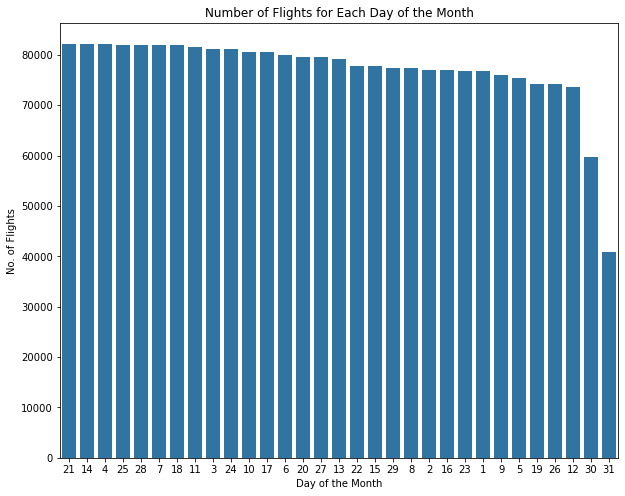

In [29]:
# plot flights of days in a months
order_day = df_clean.DayofMonth.value_counts().index
plt.figure(figsize=[10,8])
plot(df_clean, df_clean.DayofMonth, order_day)
plt.title('Number of Flights for Each Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('No. of Flights');

#### Observation
From the visualization above, it is observed that the most flights take place on the 21 of the month whereas less fligths are recorded on the last days of the month (30 and 31)

#### Question: Which day(s) of the week had more flights?

#### Visualization

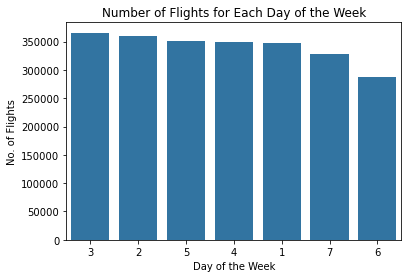

In [30]:
#plot for days of the week
order_week = df_clean.DayOfWeek.value_counts().index
plot(df_clean, df_clean.DayOfWeek,order_week)
plt.title('Number of Flights for Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('No. of Flights');

#### Observation
From the visualization, it be be observed that weekends have fewer flights than weekdays. Wednesdays had the most flights, followed by Teusdays.

#### Question: Which carriers recorded the most flights?

#### Visualization

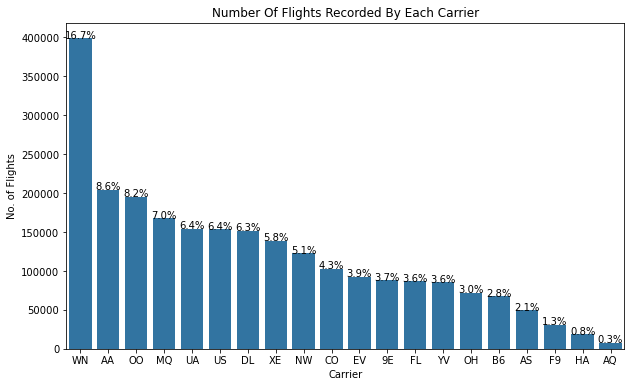

In [31]:
# plot flights recorded by carriers
plt.figure(figsize=[10,6])
carrier_counts= df_clean.UniqueCarrier.value_counts()
order_carrier = carrier_counts.index
sum_unique_carrier = df_clean.UniqueCarrier.value_counts().sum()
plot(df_clean, df_clean.UniqueCarrier, order_carrier)
plt.title('Number Of Flights Recorded By Each Carrier')
plt.xlabel('Carrier')
plt.ylabel('No. of Flights');


# get the current tick locations and labels
locs, labels = plt.xticks() 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = carrier_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/sum_unique_carrier)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

#### Observation
WN Airlines recorded the most number of flights for the year 2008 (Almost 400,000 flights). AQ had the least number of recorded flights

In percentage terms, WN undertook a whooping 16% of all recorded flights in 2008 whereas HA and AQ each had less than 1%

#### Question: Which is the most frequent cause of delay?

#### Visualization

In [32]:
# get unique cancellation codes
df_clean.CancellationCode.value_counts()

A    26075
B    25744
C    12617
D        6
Name: CancellationCode, dtype: int64

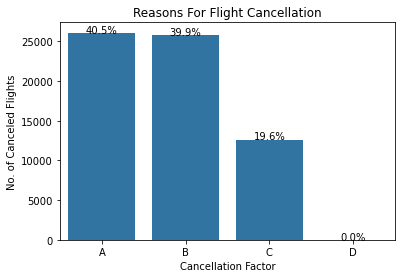

In [33]:
# plot reasons for flight cancellation
sum_cancel = df_clean.CancellationCode.value_counts().sum()
cancel_counts = df_clean.CancellationCode.value_counts()
order_cancel = df_clean.CancellationCode.value_counts().index
plot(df_clean, df_clean.CancellationCode, order_cancel)
plt.title('Reasons For Flight Cancellation')
plt.xlabel('Cancellation Factor')
plt.ylabel('No. of Canceled Flights')


# get the current tick locations and labels
locs, labels = plt.xticks() 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cancel_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/sum_cancel)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black');

#### Observation

From the above visualization, it can be observed that about 40.5% of all canceled flights were as a result of delays from the carriers. Also, 39.9% of flights that were canceled were as a result of bad weather. Lastly,about 19.6% of all flights canceled were caused by NAS. There were no flights that were canceled due to security reasons.

### Summary of Univariate Exploration

> Some variables of the dataset were chosen as features of interest for the analysis. These variables are `Month, DayofMonth, DayOfWeek, UniqueCarriers` and `CancellationCode`.
These were used to answer the following questions
* Which month(s) of the year had more flights?
* Which day(s) of the month had more flights?
* Which day(s) of the week had more flights?
* Which carriers recorded the most flights?
* Which is the most frequent cause of delay?

> From the analysis done above, the following observations were made
1. February had the least number of flights in 2008, whereas March had the most.
2. The last days of the month saw significantly less number of flights recorded.
3. Most flights took place mid-week than on weekends.
4. WN Airlines recorded the most number of flights with 16.7% of the total number of recorded flights.
5. Of the factors that contribute to cancellation of flights, carrier delays account for 41%. No flights were canceled due to security reasons. 
 

### Unusual Distributions

> The features considered in the univariate exploration above were seen to be normal. There were no unusual features that needed further investigations. As such, there was no need to make any transformations or feature engineerign to the data.

## Bivariate Exploration


#### Question: Which carrier(s) had the most number of cancelled flights?

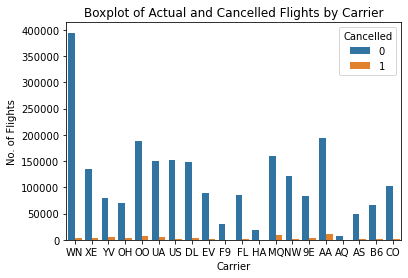

In [66]:
# plotting a clusterd barchart of actual and cancelled flights by carrier
sns.countplot(data=df_clean, x='UniqueCarrier', hue='Cancelled')
plt.title('Barchart of Actual and Cancelled Flights by Carrier')
plt.xlabel('Carrier')
plt.ylabel('No. of Flights');

In [53]:
# grouping UniqueCarrier using the Cancelled flags
cancelled_counts = df_clean.groupby(['UniqueCarrier', 'Cancelled']).size()
cancelled_counts = cancelled_counts.reset_index(name='count')

# Use DataFrame.pivot() to rearrange the data for plotting
cancelled_counts = cancelled_counts.pivot(index = 'UniqueCarrier', columns = 'Cancelled', values = 'count')

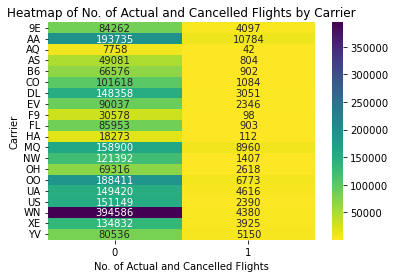

In [67]:
# plotting a heatmap of actual and cancelled flights by carrier
sns.heatmap(cancelled_counts, annot = True, fmt = 'd', cmap='viridis_r')
plt.title('Heatmap of No. of Actual and Cancelled Flights by Carrier')
plt.xlabel('No. of Actual and Cancelled Flights')
plt.ylabel('Carrier');

#### Observation

From the two graphs above, it can be obsereved that although WN had the most number of flights in 2008, they recorded very low flight cancellations. Carrier AA had by far the most number of flight cancellations.

#### Question: Which carriers have the most diverted flights?

#### Visualization

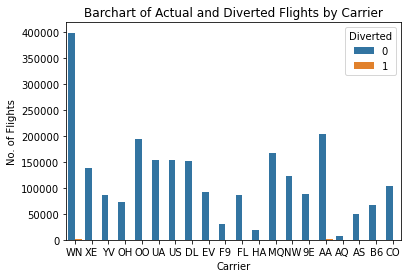

In [133]:
# barplot of diverted flights
sns.countplot(data=df_clean, x='UniqueCarrier', hue='Diverted')
plt.title('Barchart of Actual and Diverted Flights by Carrier')
plt.xlabel('Carrier')
plt.ylabel('No. of Flights');

In [70]:
diverted_counts = df_clean.groupby(['UniqueCarrier', 'Diverted']).size()
diverted_counts = diverted_counts.reset_index(name='count')

# Use DataFrame.pivot() to rearrange the data for plotting
diverted_counts = diverted_counts.pivot(index = 'UniqueCarrier', columns = 'Diverted', values = 'count')

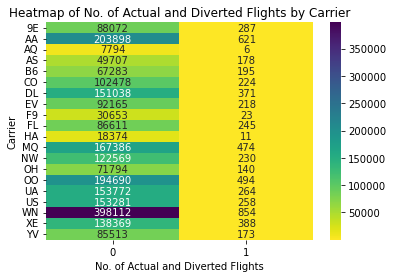

In [71]:
# plotting a heatmap of actual and cancelled flights by carrier
sns.heatmap(diverted_counts, annot = True, fmt = 'd', cmap='viridis_r')
plt.title('Heatmap of No. of Actual and Diverted Flights by Carrier')
plt.xlabel('No. of Actual and Diverted Flights')
plt.ylabel('Carrier');

#### Observation

From the observation above, WN had the most diverted flights in 2008 with 854 flight diversions

#### Question: Which carrier(s) expereinced more delays? And of which delay reasons?

#### Visualization

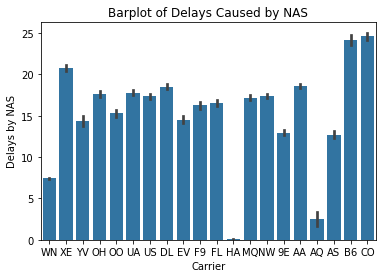

In [98]:
#barplot
sns.barplot(data=df_clean, x='UniqueCarrier', y='NASDelay', color = base_color)
plt.title('Barplot of Delays Caused by NAS')
plt.xlabel('Carrier')
plt.ylabel('Delays by NAS');

#### Observation
From the graph above, it can be observed that B6 and CO had the most flight delays by NAS

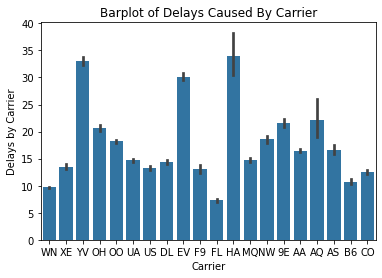

In [93]:
#barplot
sns.barplot(data=df_clean, x='UniqueCarrier', y='CarrierDelay', color = base_color)
plt.title('Barplot of Delays Caused By Carrier')
plt.xlabel('Carrier')
plt.ylabel('Delays by Carrier');


#### Observation
From the graph above, it can be observed that HA had the most flight delays occasioned by carrier delays

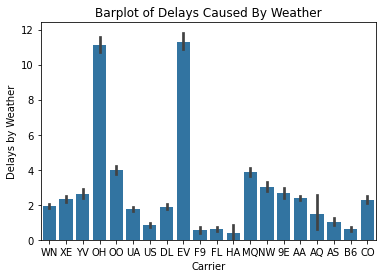

In [95]:
#barplot
sns.barplot(data=df_clean, x='UniqueCarrier', y='WeatherDelay', color = base_color)
plt.title('Barplot of Delays Caused By Weather')
plt.xlabel('Carrier')
plt.ylabel('Delays by Weather');

#### Observation

From the graph above, it can be observed that OH and EV carriers had the most flight delays by occasioned by (poor) weather conditions

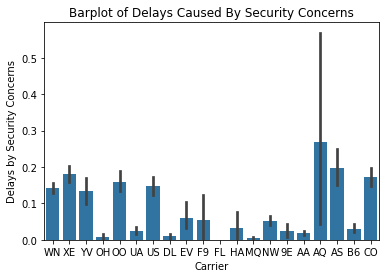

In [96]:
#barplot
sns.barplot(data=df_clean, x='UniqueCarrier', y='SecurityDelay', color = base_color)
plt.title('Barplot of Delays Caused By Security Concerns')
plt.xlabel('Carrier')
plt.ylabel('Delays by Security Concerns');

#### Observation
From the graph above, it can be observed that AQ had the most flight delays by security reasons

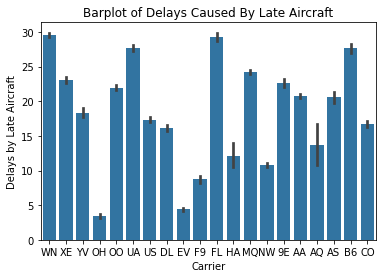

In [97]:
#barplot
sns.barplot(data=df_clean, x='UniqueCarrier', y='LateAircraftDelay', color = base_color)
plt.title('Barplot of Delays Caused By Late Aircraft')
plt.xlabel('Carrier')
plt.ylabel('Delays by Late Aircraft');

#### Observation
From the graph above, it can be observerd that quite a number of carriers had a lot of aircraft delays. Particularly, WN, UA, FL and AS had some high occurences of flight delays.

### Summary of Bivariate Exploration

> **Questions**
1. Which carrier(s) had the most number of cancelled flights?
2. Which carrier(s) have the most diverted flights?
3. Which carrier(s) expereinced more delays? And of which delay reasons?

> **Observations**
* Although WN had the most number of flights in 2008, they recorded very low flight cancellations. Carrier AA had by far the most number of flight cancellations.
* WN had the most diverted flights in 2008 with 854 flight diversions
* B6 and CO had the most flight delays by NAS
* HA had the most flight delays occasioned by carrier delays
* OH and EV carriers had the most flight delays by occasioned by (poor) weather conditions
* Quite a number of carriers had a lot of aircraft delays but WN, UA, FL and AS had the highest of delays as a result of aircraft delay.

### Interesting feature of interest
* Even though WN airlines had the highest number of recorded flights in 2008, they recorded the lowest number of cancelled flights. Wihtout making any concrete inference, it could be argued that travelers may have prefereed WN to the other carriers because booked flights with WN were less likely to be cancelled. Further investigations into the correlation between number of cancelled flights and number of recorded flights could give better insights into the relationship between number of recorded flights by a carrier and the number of cancelled flights by that carrier.

## Multivariate Exploration

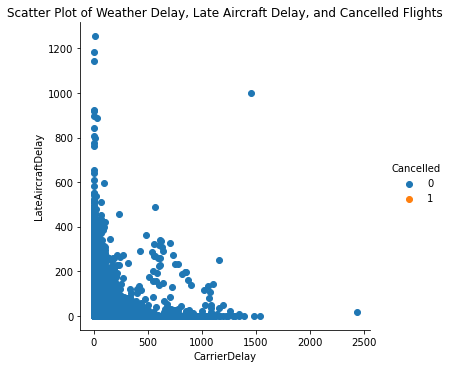

In [132]:
#plot a scatter for correlation between delays and cancelled flights
g = sns.FacetGrid(data = df_clean, hue = 'Cancelled',  height = 5)
g.map(plt.scatter, 'CarrierDelay','LateAircraftDelay')
g.add_legend()
    
plt.title('Scatter Plot of Weather Delay, Late Aircraft Delay, and Cancelled Flights');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> From the multivariate visualization above, there is a strong positive correlation between between Carrier Delay and Late Aircraft Delay. However, there was no observed correlation between these two variables and cancelled flights. This means that neither of these delay factors resulted in flight cancellations

### Interesting Observation
> No flights were cacelled due to Carrier Delays or Late Aircraft Delay.

## Conclusions
1. February had the least number of flights in 2008, whereas March had the most.
2. The last days of the month saw significantly less number of flights recorded.
3. Most flights took place mid-week than on weekends.
4. WN Airlines recorded the most number of flights with 16.7% of the total number of recorded flights.
5. Of the factors that contribute to cancellation of flights, carrier delays account for 41%. No flights were canceled due to security reasons. 
6. Although WN had the most number of flights in 2008, they recorded very low flight cancellations. Carrier AA had by far the most number of flight cancellations.
7. WN had the most diverted flights in 2008 with 854 flight diversions
8. B6 and CO had the most flight delays by NAS
9. HA had the most flight delays occasioned by carrier delays
10. OH and EV carriers had the most flight delays by occasioned by (poor) weather conditions
11. Quite a number of carriers had a lot of aircraft delays but WN, UA, FL and AS had the highest of delays as a result of aircraft delay.
12. Even though WN airlines had the highest number of recorded flights in 2008, they recorded the lowest number of cancelled flights. Wihtout making any concrete inference, it could be argued that travelers may have prefereed WN to the other carriers because booked flights with WN were less likely to be cancelled. Further investigations into the correlation between number of cancelled flights and number of recorded flights could give better insights into the relationship between number of recorded flights by a carrier and the number of cancelled flights by that carrier.
13. No flights were cacelled due to Carrier Delays or Late Aircraft Delay.
